In [1]:
%matplotlib inline
from d2l import tensorflow as d2l
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

In [2]:
def train_2d(trainer, steps=20):  #@save
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    return results

def show_trace_2d(f, results, title = ''):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = tf.meshgrid(tf.range(-5.5, 2.0, 0.1),
                          tf.range(-3.0, 3.0, 0.1))
    d2l.plt.contourf(x1, x2, f(x1, x2), cmap = plt.cm.bone)
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    d2l.plt.title(title)


La función de prueba será la función $f: \mathbb{R}^2 \rightarrow \mathbb{R},$
definida como: 

$$f(x) = x_1^2 + 2 x_2^2\, .$$

El gradiente de la función es $\nabla f: \mathbb{R}^2 \rightarrow \mathbb{R}^2,$
cuya expresión analítica es: 

$$\nabla f(x) = \begin{pmatrix} 2 x_1 \\ 4 x_2\end{pmatrix}\,.$$

In [3]:
f = lambda x1, x2: 0.1 * x1 ** 2 + 2 * x2 ** 2  # Objective
gradf = lambda x1, x2: (0.2 * x1, 4 * x2)  # Gradient

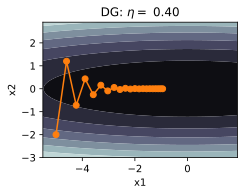

In [4]:
def gd(x1, x2, s1, s2):
    (g1, g2) = gradf(x1, x2)  # Compute gradient
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)  # Update variables

eta = 0.4
show_trace_2d(f, train_2d(gd), title = 'DG: $\eta = $ %2.2f'%eta)

/Users/agarbuno/anaconda3/envs/deep-learning/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


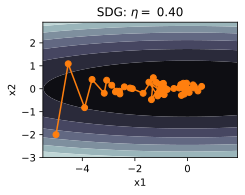

In [5]:
def sgd(x1, x2, s1, s2):
    global lr  # Learning rate scheduler
    (g1, g2) = gradf(x1, x2)
    # Simulate noisy gradient
    g1 += tf.random.normal([1], 0.0, .45)
    g2 += tf.random.normal([1], 0.0, .45)
    eta_t = eta * lr()  # Learning rate at time t
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)  # Update variables

eta = 0.4
lr = (lambda: 1)  # Constant learning rate
show_trace_2d(f, train_2d(sgd, steps=50), title = 'SDG: $\eta = $ %2.2f'%eta)

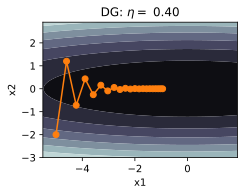

In [6]:
eta = 0.4
show_trace_2d(f, train_2d(gd), title = 'DG: $\eta = $ %2.2f'%eta)

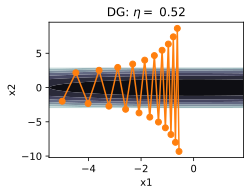

In [7]:
eta = 0.52
show_trace_2d(f, train_2d(gd), title = 'DG: $\eta = $ %2.2f'%eta)

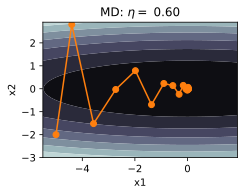

In [8]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
show_trace_2d(f, train_2d(momentum_2d), title = 'MD: $\eta = $ %2.2f'%eta)

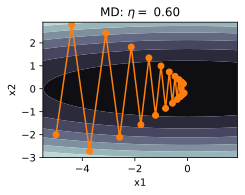

In [9]:
eta, beta = 0.6, 0.25
show_trace_2d(f, train_2d(momentum_2d), title = 'MD: $\eta = $ %2.2f'%eta)

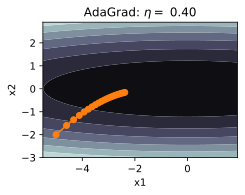

In [10]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

eta = 0.4
show_trace_2d(f, train_2d(adagrad_2d), title = 'AdaGrad: $\eta = $ %2.2f'%eta)

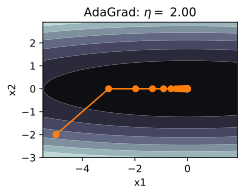

In [11]:
eta = 2
show_trace_2d(f, train_2d(adagrad_2d), title = 'AdaGrad: $\eta =$ %2.2f'%eta)

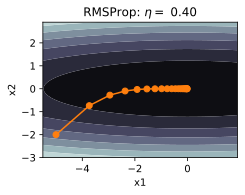

In [12]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

eta, gamma = 0.4, 0.9
show_trace_2d(f, train_2d(rmsprop_2d), title = 'RMSProp: $\eta = $ %2.2f'%eta)